# Projeto 2 - T320 (2S2023)


### Instruções

1. Antes de começar, você deve clicar na opção "Copiar para o Drive" na barra superior do Colab. Depois de clicar nela, verifique se você está trabalhando nessa versão do notebook para que seu trabalho seja salvo.
2. Quando você terminar os exercícios do projeto, vá até o menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb.
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
3. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este projeto e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
4. Se certifiquem que o notebook sendo entregue contém todas as resoluções feitas por vocês.
5. Atente-se ao prazo de entrega definido na tarefa do MS Teams. Entregas fora do prazo não serão aceitas.
6. **O projeto pode ser resolvido em grupos de no MÁXIMO 3 alunos**.
7. Todas as questões têm o mesmo peso.
8. Não se esqueça de colocar seu(s) nome(s) e número(s) de matrícula no campo abaixo. Substitua os nomes que já estão no campo abaixo.
9. Você pode consultar todo o material de aula.
10. A interpretação faz parte do projeto. Leia o enunciado de cada questão atentamente!
11. Boa sorte!

**Nomes e matrículas**:

1. Nome do primeiro aluno - Matrícula do primeiro aluno
2. Nome do segundo aluno - Matrícula do segundo aluno
3. Nome do terceiro aluno - Matrícula do terceiro aluno

### 1) Neste exercício, você irá utilizar validação cruzada para encontrar a melhor configuração para que uma rede MLP separe quatro classes.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de quatro classes.

**DICAS**

+ Perceba que ao final da célula abaixo, o conjunto total de exemplos já é divido em conjuntos de treinamento e validação.
+ As dimensões da matriz de atributos e do vetor de rótulos são impressas logo abaixo da figura.

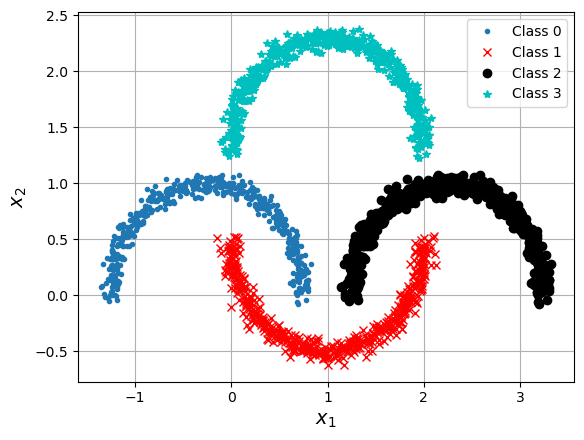

Dimensão da matriz de atributos, X: (2000, 2)
Dimensão do vetor de rótulos, y: (2000,)


In [ ]:
# Importe todas os módulos necessários.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import urllib

# Reseta o gerador de sequências pseudo aleatórias.
seed = 42
np.random.seed(seed)

# Baixa as bases de dados do dropbox.
urllib.request.urlretrieve('https://www.dropbox.com/s/t3pdze8a0qgzyxy/fourMoons.csv?dl=1', 'fourMoons.csv')

# Importa os arquivos CSV.
df = pd.read_csv('./fourMoons.csv', header=None)

# Obtendo a matriz de atributos e o vetor de rótulos.
X = df[[0, 1]].to_numpy()
y = df[2].to_numpy()

# Plot the classes.
idx0 = np.argwhere(y==0)
idx1 = np.argwhere(y==1)
idx2 = np.argwhere(y==2)
idx3 = np.argwhere(y==3)
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'ko', label='Class 2')
plt.plot(X[idx3,0], X[idx3,1], 'c*', label='Class 3')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Imprime as dimensões do conjunto total de amostras.
print('Dimensão da matriz de atributos, X:', X.shape)
print('Dimensão do vetor de rótulos, y:', y.shape)

# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

2. Use busca exaustiva (`GridSearchCV`) e o **conjunto de treinamento** para encontrar os melhores valores de alguns hiperparâmetros de uma rede MLP para classificação (i.e., `MLPClassifier`) de tal forma que o modelo classifique as quatro classes da melhor maneira possível.

O objeto da classe `GridSearchCV` automatiza o processo de busca pelo melhor conjunto de hiperparâmetros de um modelo, neste caso, os hiperparâmetros do objeto da classe `MLPClassifier`, mas poderia ser de qualquer outro modelo que necessite de ajuste fino de seus hiperparâmetros. O dicionário de hiperparâmetros, chamado no código de exemplo de `parameters` (ver link nas dicas abaixo), que é passado para o `GridSearchCV` contém os hiperparâmetros do objeto da classe `MLPClassifier` que desejamos testar e verificar qual combinação deles resulta no melhor desempenho. Portanto, o `GridSearchCV` automatiza os testes que vão descobrir dentre esses valores do dicionário `parameters` quais são os melhores valores para cada parâmetro. Portanto, o que o `GridSearchCV` faz é configurar o objeto da classe `MLPClassifier` com todas as combinações possíveis dos hiperparâmetros passados no dicionário `parameters` e retornar, ao final, a melhor combinação destes hiperparâmetros.

**DICAS**:

+ Ao instanciar o objeto da classe `MLPClassifier` configure o parâmetro de entrada `max_iter` com o valor `2000`.
+ Use **grid search** (ou seja, um objeto da classe `GridSearchCV`) para encontrar: (i) o número ideal de nós e camadas escondidas, (ii) a função de ativação ideal dos nós, (iii) o melhor otimizador e (iv) o valor da semente do gerador de sequências pseudo-aleatórias.
+ O `GridSearchCV` deve testar o  seguinte conjunto de hiperparâmetros e valores:
    * `'hidden_layer_sizes'` com os valores `(2,)`, `(4,2)`, e `(6,3)`.
    * `'activation'` com os valores `'tanh'` e `'relu'`.
    * `'solver'` com os valores `'sgd'`  e `'adam'`.
    * `'random_state'`  com os valores `12`, `42` e `69`.
+ Ao instanciar o objeto da classe `GridSearchCV`, configure-o com os seguintes parâmetros:
    * número de *folds* para o k-Fold igual a 5, ou seja, `cv=5`.
    * acurácia como sendo a estratégia para avaliar o desempenho do modelo, ou seja, `scoring='accuracy'`.
    * usar todos os processadores disponíveis para acelerar a validação cruzada do modelo, ou seja, `n_jobs=-1`.
+ Para ajudar a resolver este item, veja o seguinte exemplo: [function_approximation_regression.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation_regression.ipynb).
+ Note que não basta apenas copiar o código do exemplo, ele precisa ser modificado conforme as instruções acima.
+ O treinamento pode ser demorado, então pegue um café e tenha paciência.

In [ ]:
# Digite aqui o código do exercício.

3. Após o treinamento, imprima quais foram os melhores valores encontrados pelo grid search para os hiperparâmetros.

**DICAS**:
    
+ Para ajudar a resolver este item, veja o seguinte exemplo: [function_approximation_regression.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation_regression.ipynb).

In [ ]:
# Digite aqui o código do exercício.

4. Usando o modelo com os melhores hiperparâmetros, calcule e imprima as acurácias com os conjuntos de treinamento e validação.

**DICAS**

+ Lembre-se que após o treinamento, podemos usar o próprio objeto treinado da classe `GridSearchCV` para realizar predições usando seu método `predict`.
+ As predições são feitas com o modelo da classe `MLPClassifier` configurado e treinado com o melhor conjunto de hiperparâmetros encontrado durante a busca em grade.
+ Use a função `accuracy_score` para calcular as acurácias.

In [ ]:
# Digite aqui o código do exercício.

5. Plote a matriz de confusão da rede MLP para o **conjunto total de amostras**.

**DICAS**

+ Para ajudar a resolver este item, veja o seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).
+ Note que não basta apenas copiar o código do exemplo, ele precisa ser modificado.

In [ ]:
# Digite aqui o código do exercício.

6. Use a função `classification_report` da biblioteca SciKit-Learn para imprimir as métricas de classificação para o **conjunto total de exemplos**.

**DICA**

+ Para ajudar a resolver este item, veja o seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [ ]:
# Digite aqui o código do exercício.

7. Usando o modelo com os melhores hiperparâmetros, plote as regiões de decisão deste classificador.

**DICAS**:

+ Lembre-se que após o treinamento, podemos usar o próprio objeto treinado da classe `GridSearchCV` para realizar predições usando seu método `predict`.
+ As predições são feitas com o modelo da classe `MLPClassifier` configurado e treinado com o melhor conjunto de hiperparâmetros encontrado durante a busca em grade.
+ Para ajudar a resolver este item, veja o seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).
+ Note que não basta apenas copiar o código do exemplo, ele precisa ser modificado. No caso deste item, a modificação é apenas do nome do objeto usado com o método `predict`.

In [ ]:
# Digite aqui o código do exercício.

8. Analise a matriz de confusão, as métricas impressas no item 6 e as regiões de decisão, o que podemos concluir sobre este classificador? (**Justifique sua resposta**).

**DICAS**

+ O modelo classifica bem todas as amostras?
+ Os valores das métricas são altos ou baixos?
+ O modelo tem uma boa capacidade de generalização?

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>

9. O que você nota de diferença entre este modelo (MLP) e o modelo que treinamos no exercício 1 do projeto 1 (regressor softmax)?

**Justifique sua resposta**.

**DICAS**

+ Com a rede MLP, precisamos encontrar um polinômio e sua respectiva ordem para obtermos uma separação perfeita das classes?
+ Quando usamos polinômios, como no caso do regressor softmax, a não-linearidade é introduzida pelos monômios (i.e., os atributos) do polinômio, os quais fazem com que o mapeamento entre as entradas e a saída seja não-linear, criando as funções discriminantes com os formatos que precisamos para separar as classes. No caso da rede MLP, quem introduz a não linearidade necessária para obtermos a separação entre as classes? Para responder essa pergunta, lembre-se que as redes MLPs são compostas por combinações de nós (i.e., neurônios) que possuem funções de ativação não lineares, como as funções logística e tangente hiperbólica.

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>

### 2) Exercício sobre o modelo do neurônio de McCulloch e Pitts.

Usando-se o modelo do neurônio de McCulloch e Pitts, qual seria o valor do **limiar de ativação**, $\theta$, para classificar a função booleana dada pela tabela abaixo? Desenhe a função de ativação e o neurônio, indicando quais entradas são inibitórias, caso haja alguma.

**DICAS**:

+ Como este exercício é teórico, anexe o arquivo com sua resposta em formato **pdf** na tarefa do MS Teams.
+ Você pode precisar ter uma ou mais entradas inibitórias para encontrar o valor de $\theta$.
    + Entradas inibitórias são entradas que têm seus valores **negados**.
    + Para **negar** um valor de entrada, você pode, por exemplo, multiplicá-lo por $-1$.
+ Os atributos de entrada são `x1`, `x2` e `x3` e o valor esperado, ou seja, a saída do neurônio, é dado por `y`.

| x1 | x2 | x3 | y |
|:--:|:--:|:--:|:-:|
|  0 |  0 |  0 | 0 |
|  0 |  0 |  1 | 0 |
|  0 |  1 |  0 | 0 |
|  0 |  1 |  1 | 0 |
|  1 |  0 |  0 | 0 |
|  1 |  0 |  1 | 1 |
|  1 |  1 |  0 | 0 |
|  1 |  1 |  1 | 0 |

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>


### 3) Exercício sobre o uso da rede Multi Layer Perceptron (MLP) para regressão.

Neste exercício, você assumirá o papel de um analista de negócios de uma empresa do setor de Logística. Seu objetivo é prever o tempo estimado de chegada de uma remessa em número de dias. Você usará um conjunto de dados sintético chamado de *Shipping Logs Dataset*. Este conjunto de dados contém dados completos de remessas para todos os produtos entregues, incluindo tempo estimado, prioridade da remessa, transportadora e origem. Ele tem 10.000 linhas (i.e., exemplos) e 12 colunas de atributos. O significado de cada coluna é apresentado na tabela abaixo. Nosso objetivo é encontrar um modelo que prediga o número de dias para a entrega da remessa.

|    **Atributo**      |                                 **Descrição**                                   |
|:--------------------:|:-------------------------------------------------------------------------------:|
|  ActualShippingDays  |                  Number of days it took to deliver the shipment                 |
|        Carrier       |                            Carrier used for shipment                            |
|   YShippingDistance  |                        Distance of shipment on the Y-axis                       |
|   XShippingDistance  |                        Distance of shipment on the X-axis                       |
|      InBulkOrder     |                                Is it a bulk order                               |
|    ShippingOrigin    |                                Origin of shipment                               |
|       OrderDate      |                          Date when the order was placed                         |
|        OrderID       |                                     Order ID                                    |
|   ShippingPriority   |                               Priority of Shipping                              |
|       ProductId      |                                    Product ID                                   |
|   OnTimeDelivery     |      Whether the shipment was delivered on time                                 |
|                      | **Rótulo**                                                                      |
| ExpectedShippingDays |                Expected days for shipment - label for Regression                |


1. Execute a célula de código abaixo para importar os dados e as bibliotecas necessárias.

**DICAS**

+ Após a execução bem sucedida da célula abaixo, você visualizará as 5 primeiras linhas da base de dados.

In [ ]:
# Importe todas as bibliotecas necessárias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
!pip install category_encoders
import category_encoders as ce
import urllib

# Reseta o gerador de sequências pseudo aleatórias.
seed = 42
np.random.seed(seed)

# Baixa as bases de dados do dropbox.
urllib.request.urlretrieve('https://www.dropbox.com/s/33dse6o1be8097r/ShippingLogs.csv?dl=1', 'ShippingLogs.csv')

# Usando a biblioteca pandas para ler a base de dados.
df = pd.read_csv('./ShippingLogs.csv')

# Mostrando os primeiros cinco exemplos.
df.head()

2. Execute a célula de código abaixo para verificar a existência de valores nulos e duplicados e remover colunas inúteis ao processo de regressão.

**DICAS**

+ Os comentários abaixo explicam cada uma das instruções para limpar a base de dados.

In [ ]:
# Verificando a existência de valores duplicados.
N_null = sum(df.isnull().sum())
print("O dataset contém {} valores nulos".format(N_null))

# Removendo valores duplicados.
N_dupli = sum(df.duplicated(keep='first'))
dataset = df.drop_duplicates(keep='first').reset_index(drop=True)
print("O dataset contém {} valores duplicados".format(N_dupli))

# Removendo colunas que não trazem informações úteis para o problema da predição do número de dias para entrega da remessa.
df1 = df.drop(["OrderID", "ProductId", "OnTimeDelivery", "ActualShippingDays"], axis=1)

3. Execute a célula abaixo para realizar a engenharia de atributos na base de dados.

A engenharia de atributos é o processo de transformar os atributos em um formato adequado para o modelo de aprendizado de máquina. Neste exercício, precisamos transformar variáveis categóricas em variáveis numéricas.

A maioria dos algoritmos de aprendizado de máquina, como, por exemplo, redes neurais e regressores lineares, requer valores numéricos. Portanto, todos os atributos categóricos (por exemplo, `strings`) disponíveis no conjunto de dados devem ser codificados em rótulos numéricos antes de treinarmos um modelo.

**DICAS**

+ Os comentários abaixo explicam cada uma das instruções para realizar a engenharia de atributos.

In [ ]:
# Converte colunas categóricas em colunas numéricas com valores começando de 1.
encoder = ce.OrdinalEncoder(cols=['Carrier', 'InBulkOrder', 'ShippingOrigin', 'ShippingPriority'])
df1 = encoder.fit_transform(df1)

# Converte a coluna 'OrderDate' em uma data, com o dia em primeiro lugar.
df1['Date'] = pd.to_datetime(df1['OrderDate'], dayfirst=False)

# Cria colunas com o mês, ano, dia e semana da compra.
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year
df1['Day'] = df1['Date'].dt.day
df1['Week'] = df1['Date'].dt.isocalendar().week

# Cria a coluna 'Distance' com a distância até a entrega do produto.
df1['Distance'] = pow(pow(df1['XShippingDistance'], 2) + pow(df1['YShippingDistance'], 2), 0.5)

# Remove colunas que não serão mais utilizadas.
df1 = df1.drop(["OrderDate", "Date", "XShippingDistance", "YShippingDistance"], axis=1)

# Mostra as 5 primeiras linhas do dataset.
df1.head()

4. Execute a célula de código abaixo para criar a matriz de atributos, $\textbf{X}$, e o vetor de rótulos, $\textbf{y}$. Além disso, o conjunto total de dados é separado em conjuntos de treinamento e validação e, na sequência, eles são padronizados.

**DICAS**

+ A primeira linha de comando remove da matriz de atributos a coluna `ExpectedShippingDays`, pois ela será nosso rótulo.
+ A segunda linha cria o vetor de rótulos contendo apenas a coluna `ExpectedShippingDays`.
+ A célula imprimirá as dimensões da matriz de atributos e do vetor de rótulos.

In [ ]:
# Matriz de atributos.
X = df1.drop(['ExpectedShippingDays'], axis=1).to_numpy()

# Rótulos.
y = df1['ExpectedShippingDays'].to_numpy()

# Separa conjunto de dados em conjuntos de treinamento e validação.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Instancia um padronizador.
scaler = StandardScaler()

# Normalize os conjuntos de dados.
X_train = scaler.fit_transform(X_train) # Os parâmetros para a padronização são encontrados baseando-se no conjunto de treinamento.
X_test = scaler.transform(X_test)       # O conjunto de teste (ou validação) é padronizado com os parâmetros encontrados com o conjunto de treinamento.

# Imprime o tamanho dos conjuntos de treinamento e validação.
print('Tamanho do conjunto de treinamento:', len(y_train))
print('Tamanho do conjunto de validação:', len(y_test))

5. Neste item, iremos treinar e verificar o erro quadrático médio (MSE) cometido por um **regressor linear** na tarefa de estimar o tempo estimado de chegada de uma remessa. Treine o modelo de regressão linear com o **conjunto de treinamento**, calcule e imprima o erro quadrático médio cometido pelo modelo para os conjuntos de treinamento e validação.

**DICAS**

+ Instancie e treine um objeto da classe `LinearRegression`. A classe já foi importada durante a execução do item 1 deste exercício.
+ Não é necessário usar a classe `PolynomialFeatures`, ou seja, não usaremos polinômios, apenas funções hipótese com formato de hiperplano.
+ Também não é necessário escalonar (padronizar ou normalizar) os atributos, pois isto foi feito no item anterior.
+ Para calcular os erros cometidos com os conjuntos de treinamento e validação, use a função `mean_squared_error`, a qual foi importada durante a execução da célula de código do item 1 deste exercício.

In [ ]:
# Digite aqui o código do exercício.

6. Plote o histograma do **erro absoluto** entre os valores preditos pelo modelo de regresão linear (`LinearRegression`) para o **conjunto de validação** e os respectivos **rótulos** (i.e., valores esperados) deste conjunto. Em seguida, imprima a média, variância e desvio padrão do erro entre os valores preditos pelo modelo e os rótulos.

**DICAS**:

+ Use o **conjunto de validação** para fazer as predições com o modelo treinado no item 5 e para plotar o histograma.
+ O **erro absoluto** é a diferença entre o valor predito pelo modelo e o valor esperado, ou seja, o rótulo. Assim, o erro absoluto é calculado como: `error = y_pred_test - y_test`, onde `y_pred_test` são as predições para o conjunto de validação e `y_test` são os rótulos do conjunto de validação.
+ Use a função `hist` da biblioteca Matplotlib. Configure o parâmetro `bins` da função com o valor 100, ou seja, `bins=100`.
+ Configure os limites do eixo `x` do histograma entre -8 e 8. Para isso uso a instrução:
```python
plt.xlim([-8, 8])
```
+ Configure os limites do eixo `y` do histograma entre 0 e 200. Para isso uso a instrução:
```python
plt.ylim([0, 200])
```
+ A documentação da função `hist` pode ser encontrada em:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
+ Para ajudar a resolver este item, veja o seguinte exemplo: [linear_regression.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/regressão/linear_regression.ipynb).

In [ ]:
# Digite aqui o código do exercício.

7. Agora, vamos usar busca exaustiva (`GridSearchCV`) e o **conjunto de treinamento** para encontrar os melhores valores de alguns hiperparâmetros de uma rede `MLPRegressor` de tal forma que ela apresente o menor erro possível.

O objeto da classe `GridSearchCV` automatiza o processo de busca pelo melhor conjunto de hiperparâmetros de um modelo, neste caso, os hiperparâmetros do objeto da classe `MLPRegressor`, mas poderia ser de qualquer outro modelo que necessite de ajuste fino de seus hiperparâmetros. O dicionário de hiperparâmetros, chamado no código de exemplo de `parameters` (ver link nas dicas abaixo), que é passado para o `GridSearchCV` contém os hiperparâmetros do objeto da classe `MLPRegressor` que desejamos testar e verificar qual combinação deles resulta no melhor resultado. Portanto, o `GridSearchCV` automatiza os testes que vão descobrir dentre esses valores do dicionário `parameters` quais são os melhores para cada hiperparâmetro. Portanto, o que o `GridSearchCV` faz é configurar o objeto da classe `MLPRegressor` com todas as combinações possíveis dos hiperparâmetros passados no dicionário `parameters` e retornar, ao final, a melhor combinação destes hiperparâmetros.

**OBS**.: Ao final do grid search, o objeto da classe `GridSearchCV` retreina o modelo com os melhores valores encontrados. Portanto, não é necessário instanciar-se um novo objeto e configurá-lo, basta usar o método `predict` do objeto da classe `GridSearchCV`.

**DICAS**:

+ Ao instanciar o objeto da classe `MLPRegressor` configure os hiperparâmetros de entrada `max_iter` com o valor `5000` e o parâmetro `random_state` com a variável `seed`, definida no item 1 deste exercício.
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o número ideal de nós, (ii) a função de ativação ideal dos nós e (iii) o melhor otimizador.
+ O `GridSearchCV` deve testar o seguinte conjunto de hiperparâmetros e valores:
    * `'hidden_layer_sizes'` com os valores `(18,9)`, `(36,18)` e `(72,36)`.
    * `'activation'` com os valores `'tanh'`, `'logistic'` e `'relu'`.
    * `'solver'`  com os valores `'adam'` e `'sgd'`.
+ Ao instanciar o objeto da classe `GridSearchCV`, configure-o com os seguintes hiperparâmetros:
    * número de *folds* para o k-Fold igual a 10, ou seja, `cv=10`.
    * erro quadrático médio como sendo a estratégia para avaliar o desempenho do modelo, ou seja, `scoring='neg_mean_squared_error'`.
    * usar todos os processadores disponíveis para acelerar a validação cruzada do modelo, ou seja, `n_jobs=-1`.
+ Para ajudar a resolver este item, veja o seguinte exemplo: [function_approximation_regression.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation_regression.ipynb).
+ **O treinamento será demorado, então pegue um café e tenha paciência.**

In [ ]:
# Digite aqui o código do exercício.

8. Após o treinamento, imprima quais foram os melhores valores encontrados pelo grid search.

**DICAS**:
    
+ Para ajudar a resolver este item, veja o seguinte exemplo: [function_approximation_regression.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation_regression.ipynb).

In [ ]:
# Digite aqui o código do exercício.

9. Qual é o erro quadrático médio (MSE) da rede MLP para os conjuntos de treinamento e validação?

**DICAS**

+ Lembre-se que após o treinamento, podemos usar o próprio objeto treinado da classe `GridSearchCV` para realizar predições usando seu método `predict`.
+ As predições são feitas com o modelo da classe `MLPRegressor` configurado e treinado com o melhor conjunto de hiperparâmetros encontrado durante a busca em grade.

In [ ]:
# Digite aqui o código do exercício.

10. Plote o histograma do **erro absoluto** entre os valores preditos pelo modelo MLP (`MLPRegressor`) para o **conjunto de validação** e os respectivos **rótulos** (i.e., valores esperados) deste conjunto. Em seguida, imprima a média, variância e desvio padrão do erro entre os valores preditos pelo modelo e os rótulos.

**DICAS**:

+ Use o **conjunto de validação** para fazer as predições com o modelo treinado no item 7 e para plotar o histograma.
+ O **erro absoluto** é a diferença entre o valor predito pelo modelo e o valor esperado, ou seja, o rótulo. Assim, o erro absoluto é calculado como: `error = y_pred_test - y_test`, onde `y_pred_test` são as predições para o conjunto de validação e `y_test` são os rótulos do conjunto de validação.
+ Use a função `hist` da biblioteca Matplotlib. Configure o parâmetro `bins` da função com o valor 100, ou seja, `bins=100`.
+ Configure os limites do eixo `x` do histograma entre -8 e 8. Para isso uso a instrução:
```python
plt.xlim([-8, 8])
```
+ Configure os limites do eixo `y` do histograma entre 0 e 200. Para isso uso a instrução:
```python
plt.ylim([0, 200])
```
+ A documentação da função `hist` pode ser encontrada em:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
+ Para ajudar a resolver este item, veja o seguinte exemplo: [linear_regression.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/regressão/linear_regression.ipynb).

In [ ]:
# Digite aqui o código do exercício.

11. Neste item, você deve comparar os histogramas, médias, variâncias e desvios padrão do erros de predição cometidos pelos dois modelos (i.e., regressor linear e rede MLP) e, na sequência, responder:

+ Dado que um modelo de regressão perfeito, ou seja, um modelo que não comete nenhum erro, teria um histograma com todo os valores centrados em zero (neste caso, a média, variância e desvio padrão seriam iguais a 0), qual é o melhor modelo de regressão?
    + Qual modelo apresenta o menor desvio padrão e, consequentemente, na média, o menor erro em relação ao valor esperado?

**Justifique todas as respostas.**

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>


### 4) Exercício sobre comparação de diferentes tipos de classificadores.

Neste exercício, iremos comparar o desempenho de classificadores baseados no regressor logístico e em redes MLP na tarefa de predição de falhas.

Você assumirá o papel de um analista de dados atribuído a uma equipe de manutenção de uma grande organização de manufatura. Sua equipe de manutenção pediu a você, como analista de dados, para ajudar na previsão de falhas comuns. Eles forneceram a você um conjunto de dados históricos que contém características vinculadas a um determinado tipo de falha e gostariam que você previsse qual falha ocorrerá no futuro. Os tipos de falha incluem `No Failure`, `Overstrain` and `Power Failures` (i.e., Sem Falha, Sobretensão e Falhas de Energia, respectivamente).

O conjunto de dados que usaremos neste exercício vem do "Conjunto de dados de manutenção preditiva AI4I 2020" (disponível no UCI Machine Learning Repository - Dua, D. e Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.)

As colunas e seus respectivos tipos e descrições estão listadas abaixo.

|     **Nome da coluna**     | **Tipo do dado** |                                                                  **Descrição**                                                                 |
|:-----------------------:|:-------------:|:------------------------------------------------------------------------------------------------------------------------------------------------:|
|           UID           |      INT      |                                                     unique identifier ranging from 1 to 10000                                                    |
|        product_ID        |     STRING    |           consisting of a letter L, M, or H for low, medium, and high as product quality variants and a variant-specific serial number           |
|           type          |     STRING    |                                      initial letter associated with productID consisting on L, M, or H only                                      |
|   Air_Temperature [K]   |    DECIMAL    |                                                        air temperature specified in kelvin                                                       |
| Process_Temperature_K_ |    DECIMAL    |                        precisely controlled temperatures to ensure quality of a given type of product specified in kelvin                        |
|  Rotational_speed_rpm_ |    DECIMAL    | rotational speed, of an object rotating around an axis is the number of turns of the object divided by time, specified as revolutions per minute |
|       Torque_Nm_       |    DECIMAL    |                                        machine turning force through a radius, expressed in newton meters                                        |
|     Tool_wear_min_     |      INT      |                                                          tool wear expressed in minutes                                                          |
|                         |                |                  **Rótulo**                                                              |
|  Failure_Type  |     STRING    |                                                 No Failure, Power Failure, or Overstrain Failure                                                 |


#### **Referências**

[1] 'AI4I 2020 Predictive Maintenance Dataset', https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

[2] 'Predicting Machine Failure Types (Manufacturing)', https://catalog.workshops.aws/canvas-immersion-day/en-US/1-use-cases/6-manufacturing

[3] '97% Accuracy along with EDA and UP Sampling', https://www.kaggle.com/code/durgancegaur/97-accuracy-along-with-eda-and-up-sampling

1. Execute a célula de código abaixo para importar as bibliotecas necessárias e carregar a base de dados. Analise as cinco primeiras linhas da base de dados que são impressas abaixo.

In [ ]:
# Importando as bibliotecas necessárias.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
!pip install category_encoders
import category_encoders as ce
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import urllib

# Semente usada para resetar geradores de sequência PN.
seed = 42
np.random.seed(seed)

# Baixa as bases de dados do dropbox.
urllib.request.urlretrieve('https://www.dropbox.com/s/8azx0mjvv246mjm/maintenance_dataset.csv?dl=1', 'maintenance_dataset.csv')

# Carrega o banco de dados.
df = pd.read_csv('./maintenance_dataset.csv')

# Apresenta as cinco primeiras linhas do banco de dados.
df.head()

2. Execute a célula de código abaixo para verificar a existência de valores nulos e duplicados e remover colunas inúteis.

**DICAS**

+ Os comentários abaixo explicam cada uma das instruções para limpar a base de dados.

In [ ]:
# Verificando a existência de valores duplicados.
N_null = sum(df.isnull().sum())
print("O dataset contém {} valores nulos".format(N_null))

# Removendo valores duplicados.
N_dupli = sum(df.duplicated(keep='first'))
dataset = df.drop_duplicates(keep='first').reset_index(drop=True)
print("O dataset contém {} valores duplicados".format(N_dupli))

# Removendo colunas que não trazem informações úteis para o problema de predição de falhas.
df1 = df.drop(["UDI", "Product_ID"],axis=1)

3. Execute a célula abaixo para realizar a engenharia de atributos da base de dados.

A engenharia de atributos é o processo de transformar os atributos em um formato adequado para o modelo de aprendizado de máquina. Neste exercício, precisamos transformar variáveis categóricas em variáveis numéricas.

A maioria dos algoritmos de aprendizado de máquina requer valores numéricos. Portanto, todos os atributos categóricos (como, por exemplo, strings) disponíveis no conjunto de dados devem ser codificados em rótulos numéricos antes de treinarmos um modelo.

**DICAS**

+ Os comentários abaixo explicam cada uma das instruções para realizar a engenharia de atributos.

In [ ]:
# Converte colunas categóricas em colunas numéricas com valores começando de 1.
encoder = ce.OrdinalEncoder(cols=['Type', 'Failure_Type'])
df1 = encoder.fit_transform(df1)

# Converte valores numéricos que se iniciam em 1 em valores que se iniciam em 0. Assim, os rótulos das classes começam em 0.
scaler = LabelEncoder()
df1['Failure_Type'] = scaler.fit_transform(df1['Failure_Type'])

# Mostra as 5 primeiras linhas do dataset.
df1.head()

4. Execute a célula de código abaixo para criar a matriz de atributos, $\textbf{X}$, e o vetor de rótulos, $\textbf{y}$.

**DICAS**

+ A primeira linha de comando remove da matriz de atributos a coluna `Failure_Type`, pois ela será nosso rótulo.
+ A segunda linha cria o vetor de rótulos contendo apenas a coluna `Failure_Type`.
+ A célula imprimirá as dimensões da matriz de atributos e do vetor de rótulos.

In [ ]:
# Criando o conjunto de pares de treinamento, X e y.
X = df1.drop(columns="Failure_Type", axis=1).to_numpy()
y = df1["Failure_Type"].to_numpy()

# Atributos.
print('Dimensão da matriz de atributos:', X.shape)
# Rótulos.
print('Dimensão do vetor de rótulos:', y.shape)

5. Execute a célula de código abaixo e analise a quantidade de exemplos de cada classe.

In [ ]:
# Plota histograma com a quantidade de exemplos por classe.
fig, ax = plt.subplots()
bars = ax.bar(['No failure', 'Power Failure', 'Overstrain Failure'], [len(y[y==0]), len(y[y==1]), len(y[y==2])])
ax.bar_label(bars)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Quantidade de exemplos de cada classe', fontsize=12)
plt.ylim([1, 10000])
plt.grid()
plt.show()

6. Após ter analisado a quantidade de exemplos em cada uma das três classes no item anterior, o que se pode concluir sobre elas?

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>


7. Lidar com um problema desbalanceado, ou seja, em que as classes têm uma grande discrepância em termos de número de amostras, pode ser um desafio. Portanto, é importante adotar estratégias adequadas para criar conjuntos de treinamento e validação que tenham uma boa proporção entre as classes.

A reamostragem é uma estratégia que envolve a manipulação do conjunto de dados original para criar um equilíbrio entre as classes. Duas abordagens comuns são o oversampling (aumentar as amostras das classes minoritárias) e o undersampling (reduzir as amostras da classe majoritária).

A biblioteca `imbalanced-learn` oferece uma série de classes que implementam essas técnicas, como as classes `RandomOverSampler` e `RandomUnderSampler`.

Neste item, usaremos a estratégia do oversampling aleatório, implementado através da classe `RandomOverSampler`. O oversampling aleatório seleciona aleatoriamente uma quantidade específica de amostras das classes minoritárias e as duplica para equilibrar a distribuição de classes em um conjunto de dados desbalanceado. Essa replicação é feita sem levar em consideração a estrutura dos dados ou a relação entre os exemplos. Os exemplos são escolhidos de forma independente um do outro. O oversampling não altera os exemplos da classe majoritária, apenas das classes minoritárias.

O oversampling aleatório é uma técnica simples e fácil de implementar, pois não requer cálculos complexos ou algoritmos adicionais. No entanto, ele pode levar ao *overfitting* do modelo, uma vez que os exemplos das classes minoritárias são duplicados diretamente, aumentando sua influência no modelo de aprendizado de máquina.

Em geral, não há uma abordagem única que funcione melhor para todos os casos. Recomenda-se experimentar diferentes técnicas e avaliar os resultados com base nas métricas relevantes para o problema específico.

Após esta breve descrição sobre algumas possíveis formas de se balancear uma base de dados desbalanceada, execute a célula de código abaixo. Ela aplica a estratégia do oversampling aleatório, aumentando o número de amostras das classes minoritárias, plota o histograma com a quantidade de amostras de cada classe após o oversampling, divide o conjunto total de amostras em conjuntos de treinamento e validação e, ao final, normaliza os conjuntos.

**OBS**.: O novo conjunto de dados já está dividido em conjuntos **normalizados** de treinamento e validação.

**DICAS**

+ Os novos conjuntos normalizados de treinamento e validação são dados por `X_train/y_train` e `X_test/y_test`, respectivamente.

#### Referências

[1] 'A Gentle Introduction to Imbalanced Classification', https://machinelearningmastery.com/what-is-imbalanced-classification/

[2] '8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset', https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

[3] 'Solving The Class Imbalance Problem', https://towardsdatascience.com/solving-the-class-imbalance-problem-58cb926b5a0f

[4] 'Imbalanced Data : How to handle Imbalanced Classification Problems', https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/

In [ ]:
# Instancia um objeto de oversampling aleatório.
ros = RandomOverSampler(sampling_strategy='not majority', random_state=seed)

# Aplica o oversampling aleatório ao conjunto desbalanceado.
X_resampled, y_resampled = ros.fit_resample(X, y)

# Plota histograma com a quantidade de exemplos por classe.
fig, ax = plt.subplots()
bars = ax.bar(['No failure', 'Power Failure', 'Overstrain Failure'], [len(y_resampled[y_resampled==0]), len(y_resampled[y_resampled==1]), len(y_resampled[y_resampled==2])])
ax.bar_label(bars)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Quantidade de exemplos de cada classe', fontsize=12)
plt.ylim([1, 10000])
plt.grid()
plt.show()

# Divide o conjunto total de dados em conjuntos de treinamento e validação.
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=seed)

# Instancia um padronizador.
scaler = MinMaxScaler()

# Normalize os conjuntos de dados.
X_train = scaler.fit_transform(X_train) # Os parâmetros para a normalização são encontrados baseando-se no conjunto de treinamento.
X_test = scaler.transform(X_test)       # O conjunto de teste (ou validação) é normalizado com os parâmetros encontrados com o conjunto de treinamento.

8. Analise a figura acima e responda:

+ O que ocorreu com a quantidade de amostras das três classes?

(**Justifique sua resposta**).

**DICAS**

+ Verifique o número de amostras das três classes no item 5.

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>


9. Agora, vamos usar busca exaustiva (`GridSearchCV`) e o **conjunto de treinamento** para encontrar os valores ideais para alguns dos hiperparâmetros de um objeto da classe `LogisticRegression` de tal forma que o modelo classifique da melhor forma possível as três classes.

O objeto da classe `GridSearchCV` automatiza o processo de busca pelo melhor conjunto de hiperparâmetros de um modelo, neste caso, os hiperparâmetros do objeto da classe `LogisticRegression`, mas poderia ser de qualquer outro modelo que necessite de ajuste fino de seus hiperparâmetros. O dicionário de hiperparâmetros, chamado no código de exemplo de `parameters`, que é passado para o `GridSearchCV` contém os hiperparâmetros do objeto da classe `LogisticRegression` que desejamos testar e verificar qual combinação deles resulta no melhor resultado. Portanto, o `GridSearchCV` automatiza os testes que vão descobrir dentre esses valores do dicionário `parameters` quais são os melhores para cada parâmetro. Portanto, o que o `GridSearchCV` faz é configurar o objeto da classe `LogisticRegression` com todas as combinações possíveis dos hiperparâmetros passados no dicionário `parameters` e retornar, ao final, a melhor combinação destes hiperparâmetros.

**OBS**.: Ao final do grid search, o objeto da classe `GridSearchCV` retreina o modelo com os melhores valores encontrados. Portanto, não é necessário instanciar-se um novo objeto e configurá-lo, basta usar o método `predict` do objeto da classe `GridSearchCV`.

**DICAS**:

+ Ao instanciar o objeto da classe `LogisticRegression` configure os hiperparâmetros de entrada `penalty` com o valor `None`, ou seja, `penalty=None`, `random_state` com a variável `seed` definida no item 1 deste exercício, ou seja, `random_state=seed` e `n_jobs` com o valor `-1`, ou seja, `n_jobs=-1` (habilita o uso de todos os processadores disponíveis para acelerar o treinamento).
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o melhor otimizador e (ii) a melhor abordagem de classificação.
+ O `GridSearchCV` deve testar o  seguinte conjunto de hiperparâmetros e valores:
    * `'solver'` com as strings `'lbfgs'`, `'newton-cg'`, `'sag'` e `'saga'`.
    * `'multi_class'` com as strings `'ovr'` e `'multinomial'`.
+ Ao instanciar o objeto da classe `GridSearchCV`, configure-o com os seguintes hiperparâmetros:
    * número de *folds* para o k-Fold igual a 10, ou seja, `cv=10`.
    * acurácia como sendo a estratégia para avaliar o desempenho do modelo, ou seja, `scoring='accuracy'`.
    * usar todos os processadores disponíveis para acelerar a validação cruzada do modelo, ou seja, `n_jobs=-1`.
+ Para ajudar a resolver este item, veja o seguinte exemplo: [function_approximation_regression.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation_regression.ipynb). Só não se esqueça que você deve usar a classe `LogisticRegression` ou invés da `MLPRegressor` que está sendo usada no exemplo.
+ **O treinamento pode ser um pouco demorado, então pegue um café e tenha paciência**.

In [ ]:
# Digite aqui o código do exercício.

10. Após o treinamento, imprima quais foram os melhores valores encontrados pela busca exaustiva, ou seja, o *grid search*.

**DICAS**:
    
+ Para ajudar a resolver este item, veja o seguinte exemplo: [function_approximation_regression.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation_regression.ipynb).

In [ ]:
# Digite aqui o código do exercício.

11. Usando o melhor modelo baseado no regressão logistica encontrado no item 9, calcule a imprima as acurácias para os conjuntos de treinamento e validação.

**DICAS**

+ Lembre-se que ao final do grid search, o objeto da classe `GridSearchCV` retreina o modelo com os melhores valores encontrados. Portanto, não é necessário instanciar-se um novo objeto e configurá-lo, basta usar o método `predict` do objeto da classe `GridSearchCV`.

In [ ]:
# Digite aqui o código do exercício.

12. Plote a matriz de confusão do modelo para os exemplos do **conjunto de validação**.

**DICA**

+ Para ajudar a resolver este item, veja o seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classifica%C3%A7%C3%A3o/classification_metrics.ipynb).

In [ ]:
# Digite aqui o código do exercício.

13. Use a função `classification_report` da biblioteca SciKit-Learn para imprimir algumas das métricas de classificação para o **conjunto de validação**.

**OBS**.: Configure o parâmetro `digits` da função `classification_report` com o valor 4, ou seja, a função irá imprimir as métricas com 4 casas decimais.
```python
print(classification_report(y_test, y_pred, digits=4))
```

**DICA**

+ Para ajudar a resolver este item, veja o seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [ ]:
# Digite aqui o código do exercício.

14. Use busca exaustiva (`GridSearchCV`) e o **conjunto de treinamento** para encontrar os valores ideais para alguns dos hiperparâmetros de um objeto da classe `MLPClassifier` de tal forma que o modelo classifique o melhor possível as três classes.

O objeto da classe `GridSearchCV` automatiza o processo de busca pelo melhor conjunto de hiperparâmetros de um modelo, neste caso, os hiperparâmetros do objeto da classe `MLPClassifier`, mas poderia ser de qualquer outro modelo que necessite de ajuste fino de seus hiperparâmetros. O dicionário de hiperparâmetros, chamado no código de exemplo de `parameters`, que é passado para o `GridSearchCV` contém os hiperparâmetros do objeto da classe `MLPClassifier` que desejamos testar e verificar qual combinação deles resulta no melhor resultado. Portanto, o `GridSearchCV` automatiza os testes que vão descobrir dentre esses valores do dicionário `parameters` quais são os melhores para cada parâmetro. Portanto, o que o `GridSearchCV` faz é configurar o objeto da classe `MLPClassifier` com todas as combinações possíveis dos hiperparâmetros passados no dicionário `parameters` e retornar, ao final, a melhor combinação destes hiperparâmetros.

**OBS**.: Ao final do grid search, o objeto da classe `GridSearchCV` retreina o modelo com os melhores valores encontrados. Portanto, não é necessário instanciar-se um novo objeto e configurá-lo, basta usar o método `predict` do objeto da classe `GridSearchCV`.

**DICAS**:

+ Ao instanciar o objeto da classe `MLPClassifier` configure os hiperparâmetros de entrada `max_iter` com o valor `10000`, ou seja, `max_iter=10000` e `random_state` com a variável `seed` definida no item 1 deste exercício, ou seja, `random_state=seed`.
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o número ideal de nós e camadas escondidas, (ii) a função de ativação ideal dos nós e (iii) o melhor otimizador.
+ O `GridSearchCV` deve testar o  seguinte conjunto de hiperparâmetros e valores:
    * `'hidden_layer_sizes'` com as tuplas `(6,)`, `(3,)`, `(6,3)`, `(12,6,3)`,e `(24,12,6,3)`.
    * `'activation'` com as strings `'logistic'`, `'tanh'`, e `'relu'`.
    * `'solver'` com as strings `'sgd'`, `'lbfgs'` e `'adam'`.
+ Ao instanciar o objeto da classe `GridSearchCV`, configure-o com os seguintes hiperparâmetros:
    * número de *folds* para o k-Fold igual a 10, ou seja, `cv=10`.
    * acurácia como sendo a estratégia para avaliar o desempenho do modelo, ou seja, `scoring='accuracy'`.
    * usar todos os processadores disponíveis para acelerar a validação cruzada do modelo, ou seja, `n_jobs=-1`.
+ Para ajudar a resolver este item, veja o seguinte exemplo: [function_approximation_regression.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation_regression.ipynb). Só não se esqueça que você deve usar a classe `MLPClassifier` ou invés da `MLPRegressor` que está sendo usada no exemplo.
+ **O treinamento pode ser um pouco demorado, então pegue um café e tenha paciência**.

In [ ]:
# Digite aqui o código do exercício.

15. Após o treinamento, imprima quais foram os melhores valores encontrados pela busca exaustiva, ou seja, o *grid search*.

**DICAS**:
    
+ Para ajudar a resolver este item, veja o seguinte exemplo: [function_approximation_regression.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation_regression.ipynb).

In [ ]:
# Digite aqui o código do exercício.

16. Usando o melhor modelo baseado na rede MLP encontrado no item 14, calcule a imprima as acurácias para os conjuntos de treinamento e validação.

**DICAS**

+ Lembre-se que ao final do grid search, o objeto da classe `GridSearchCV` retreina o modelo com os melhores valores encontrados. Portanto, não é necessário instanciar-se um novo objeto e configurá-lo, basta usar o método `predict` do objeto da classe `GridSearchCV`.

In [ ]:
# Digite aqui o código do exercício.

17. Plote a matriz de confusão do modelo para os exemplos do **conjunto de validação**.

**DICA**

+ Para ajudar a resolver este item, veja o seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classifica%C3%A7%C3%A3o/classification_metrics.ipynb).

In [ ]:
# Digite aqui o código do exercício.

18. Use a função `classification_report` da biblioteca SciKit-Learn para imprimir algumas das métricas de classificação para o **conjunto de validação**.

**OBS**.: Configure o parâmetro `digits` da função `classification_report` com o valor 4, ou seja, a função irá imprimir as métricas com 4 casas decimais. veja o exemplo abaixo.
```python
print(classification_report(y_test, y_pred, digits=4))
```

**DICA**

+ Para ajudar a resolver este item, veja o seguinte exemplo: [classification_with_cross_validation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_with_cross_validation.ipynb).

In [ ]:
# Digite aqui o código do exercício.

19. Analise as matrizes de confusão e os reportes de métricas dos dois classificadores treinados neste exercício e responda:

+ Qual dos dois classificadores tem o melhor desempenho?
+ Podemos usar apenas a acurácia para decidir qual é o melhor classificador (lembre-se que balanceamos as classes)?

**Justifique suas respostas**.

**DICA**

+ Reveja a parte V sobre classificação: **Classificação (Parte V)**.

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>